In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pint
import sympy as smp

Here the `pint` module is used because dealing with units is a real pain and this package makes them very easy to manage in python.

In [2]:
u = pint.UnitRegistry()

# Question 1

Using 

$$KE=(\gamma-1)m_0c^2$$

we get

$$\gamma = 1+\frac{KE}{m_0c^2}$$

In [3]:
gam = 1 + 200 / 511

And $$\beta = \sqrt{1-\gamma^{-2}}$$

In [4]:
beta = np.sqrt(1-gam**-2)
beta

0.6953140418738832

So the **answer is C**

# Question 2

Supposing that at each stage, the electron beam is accelerated such that it gains approximately 10mA, we would need approximately 8 of these machines (2440kg total according to data sheet). Thus the **answer is d**.

# Question 3

The phase velocity is given by

$$v_p = \lambda_g f$$

where

$$\lambda_g = \frac{\lambda_f}{\sqrt{1-(\lambda_f/\lambda_c)^2}}$$

For electrons travelling at approximately the speed of light,

$$\lambda_f=c/f$$

and the lower cutoff wavelength is given by

$$\lambda_c = 2 \pi a / u_{0,1}$$

In [5]:
f = 2856 * u.MHz
c = 3e8 * u.m/u.s
a = 10*u.cm / 2
lam_f = c/f
lam_c = 2*np.pi*a / 2.405
lam_g = lam_f / np.sqrt(1-(lam_f/lam_c)**2)

In [6]:
lam_g.to_reduced_units()

0.1767049950092453 <Unit('meter')>

Or around 10cm, which was confirmed in the notes. The phase velocity is given by

In [7]:
v_p = lam_g*f
v_p.to_reduced_units()

504669465.74640465 <Unit('meter / second')>

So the **answer is e**.

# Question 4

4 cavities per wavelength means that $\lambda_g=4x$ and we want

$$\frac{\lambda_g}{\Delta T} = \frac{4x}{\Delta T} = \beta c \implies x=\frac{\Delta T \beta c}{4}$$

In [14]:
gam = 1 + 40 / 511
beta = np.sqrt(1-gam**-2)
x = 1/f * beta * u.c /4
x.to('cm')

0.981619469620527 <Unit('centimeter')>

So the answer is **c**

## Question 5

This is the same as question 4, only the kinetic energy of the electron changes.

In [15]:
gam = 1 + 240 / 511
beta = np.sqrt(1-gam**-2)
x2 = 1/f * beta * u.c /4
x2.to('cm')

1.9230822962390095 <Unit('centimeter')>

Need to add these together since the net position will be $x + x_2$

In [16]:
xtot = x+x2
xtot.to('cm')

2.9047017658595364 <Unit('centimeter')>

# Question 6

In [10]:
A = 600*u.mA/(u.mm**2 * u.K**2)
Ts = np.array([1200,1600,1900,2200,2400,2600]) * u.K
W = 4.54*u.eV
cross_sec_area = np.pi*(2.5*u.mm)**2


I = cross_sec_area*A*Ts**2 * np.exp(-W/(u.boltzmann_constant * Ts))

The following is in the order of the increasing temperatures listed as a) to e) in the problem. The units are in milliamperes

In [11]:
I.magnitude

array([1.45339222e-09, 1.51025577e-04, 3.85718966e-02, 2.26859502e+00,
       1.98620112e+01, 1.26153637e+02])

# Question 7

## Part A

While this technically has an analytic solution, it is faster in this case to solve for it numerically

In [12]:
Ts = np.linspace(2600, 2800, 100000)*u.K
Is = cross_sec_area*A*Ts**2 * np.exp(-W/(u.boltzmann_constant * Ts))

The temperature is:

In [13]:
Ts[np.argmin(np.abs(Is-140*u.mA))]

2612.2161221612214 <Unit('kelvin')>

## Part B

Given

$$V_{acc} = \sqrt{PZ}  - IZ/2$$

and 

* $P=1.96$MW
* $Z=55$M$\Omega$
* $I=14$mA

we get

In [14]:
P = 1.96*u.MW
Z = 55*u.Mohm
I = 14*u.mA

V = (P*Z)**(1/2)-I*Z/2
V.to('megavolts')

9.997677881933926 <Unit('megavolt')>

So the beam energy is 10MeV (since the charge of an electron is $e$ and its being accelerated by $10$V)

## Part C

Get minimum and maximum temperature

In [15]:
T = Ts[np.argmin(np.abs(Is-140*u.mA))]
T_min = T-25*u.K
T_max = T+25*u.K

Get corresponding minimum and maximum current

In [16]:
I_min = cross_sec_area*A*T_min**2 * np.exp(-W/(u.boltzmann_constant * T_min))
I_max = cross_sec_area*A*T_max**2 * np.exp(-W/(u.boltzmann_constant * T_max))

In [17]:
print(f'Minimum Current: {I_min:.2f}MeV')
print(f'Maximum Current: {I_max:.2f}MeV')

Minimum Current: 113.01 milliampereMeV
Maximum Current: 172.76 milliampereMeV


## Part D

Get the voltage range

In [18]:
V_min = (P*Z)**(1/2)-(I_min/10)*Z/2
V_max = (P*Z)**(1/2)-(I_max/10)*Z/2
V_min = V_min.to('megavolts').magnitude
V_max = V_max.to('megavolts').magnitude

Get the energy range in absolute and percent

In [19]:
V = V.to('megavolts').magnitude
print(f'Beam energy range: {V_max:.2f}eV to {V_min:.2f}eV')
print(f'Energy Range (Absolute): {np.abs(V_max - V_min):.2f}MeV')
print(f'Energy Range (Percent): {np.abs(V_max - V_min)/V *100 :.2f}%')

Beam energy range: 9.91eV to 10.07eV
Energy Range (Absolute): 0.16MeV
Energy Range (Percent): 1.64%


# Question 8

## Part A

A diode gun consists of a thermionic diode. The thermionic diode itself consists of a heated cathode (from which electrons are boiled off due to a high temperature) and an anode to which electrons are attracted. By heating up the surface to boil off electrons and providing a current to accelerate these electrons, a current can be produced. A gun with grid control consists of a triode where the third "ode" is a grid between the cathode and electron to control current. The grid is held at a negative potential to prevent electrons from being accelerated towards the anode.

## Part B

Using $I=pV^{3/2}$ we get

In [20]:
p = 6.7 * u.mA / u.kV**1.5
I = 250*u.mA
V = (I/p)**(2/3)
V.to_reduced_units()

11.166321742749934 <Unit('kilovolt')>

## Part C

In [21]:
Z = 55*u.Mohm
P = 1.96*u.MW
V = (P*Z)**(1/2)-(I/10)*Z/2
V = V.to('MV').magnitude
print(f'The beam energy is {V:.2f} MeV')

The beam energy is 9.70 MeV


## Part D

Using $$P=(V_{acc}+IZ/2)^2/Z$$ and the fact that only 10% of the current is transferred we get

In [22]:
Vacc = 6 * u.MV
P = (Vacc + (I/10)*Z/2)**2/Z
P = P.to('MW').magnitude
print(f'The applied power should be {P:.2f} MW')

The applied power should be 0.81 MW


## Part E

Using $$I=\frac{2}{Z}\left(\sqrt{PZ} - V_{acc} \right)$$

and the fact that only 10% of the current is transferred we get

In [23]:
# Assuming we still want the same V from part C
Z = 55*u.Mohm
P = 1.96*u.MW
I = 250*u.mA
V = (P*Z)**(1/2)-(I/10)*Z/2

# Then use the V from above here
P = 1.5*u.MW
I = 20/Z * (np.sqrt(P*Z) - Vacc)
I = I.to('mA').magnitude
print(f'The applied current should be {I:.2f} mA')

The applied current should be 1121.07 mA


# Question 9

## Part A

The duty cycle is given by $D=Tf$ where $T$ is the pulse length and $f$ is the frequency

In [24]:
f = 180*u.s**(-1)
T = 6 * u.us
D = T*f

The duty cycle is

In [25]:
D.to_reduced_units()

0.00108 <Unit('dimensionless')>

## Part B

The average power is the power input times the duty cycle

In [26]:
P_avg = 5*u.MW * D
P_avg.to('kW')

5.4 <Unit('kilowatt')>

## Part C

Assuming that all power is absorbed by the water, we can write

* $dE=mcdT$ ($m$ is mass and $c$ is heat capacity)
* $P=dE/dt = mc \cdot dT/dt$ (where $P$ is the average power from part b)
* $m = f \rho \Delta t$ where $f$ is the flow rate in $l/s$ and $\rho$ is the density of water

And the fact that power is constant we get

$$\frac{\Delta T}{\Delta t} = \frac{P}{mc} = \frac{P}{f \rho c \Delta t}$$

and thus

$$\Delta T = \frac{P}{f \rho c}$$

In [27]:
f = 10 * u.L / u.min
c = 4.18 * u.J / (u.g * u.K)
rho = 1000 * u.g/u.L

Compute change in temperature:

In [28]:
dT = P_avg/(f*rho*c)
dT = dT.to('K')
print(f'The change in temperature is {dT:.2f}')

The change in temperature is 7.75 kelvin


# Question 10

## Part A

The energy slits are designed to absorb energy that is too low or too high. Assuming the beam is approximately Gaussian in energy fluence with mean value equal to the specified beam energy, none of the "peak" energy strikes the energy slits, since the peak energy is precisely what is being selected for.

As for the power, the "peak" power (power when beam is on) is given by

In [29]:
E0 = 10*u.MeV
I = 50*u.mA

P = (E0 / u.e) * I
P.to('MW')

0.5 <Unit('megawatt')>

If 20% of everything hits the slits, then 0.1MW hits the slits.

## Part B

Assume the beam is narrowly distributed around 10MeV so that the energy of all particles absorbed is approximately at 10MeV. In one second, the energy absorbed is

$$P_{tot} = 0.2 \cdot E_0 \cdot T \cdot f \cdot I \cdot \frac{1}{e} $$

where 

* $E_0$ is the energy of an individual particle of the beam
* $Tf$ represents the duty cycle
* $I/e$ represents the flux of electrons hitting the target

In [30]:
T = 4*u.us
f = 400*u.Hz
Ptot = 0.2*E0*T*f*I/u.e

In [31]:
Ptot.to('J/s')

159.99999999999997 <Unit('joule / second')>

So the average energy absorbed every second is about 160 joules. In terms of every pulse (400 times a second) the average energy absorbed is 160/400= 0.4 joules.

# Question 11

Define data from table

In [32]:
nuclides = np.array(['Cs137', 'Ir192', 'Au198', 'Ra226', 'Co60'])
molar_masses = np.array([137, 192, 198, 226, 60]) * u.g/u.mol
halflifes = np.array([30, 74/365.25, 2.7/365.25, 1600, 5.27])*u.year
energies = np.array([0.662, 0.38, 0.41, 0.83, 1.25])*u.MeV
AKS = np.array([77.3, 108, 56.2, 193.9, 309])*u.uGy*u.m**2 / (u.GBq * u.hr)

## Part 1

Compute specific activities

In [33]:
SAs = u.avogadro_constant * np.log(2) / (halflifes*molar_masses)
SAs = SAs.to(u.Ci/u.g)

Plot

C:\Users\lukep\anaconda3\lib\site-packages\numpy\ma\core.py:2831: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


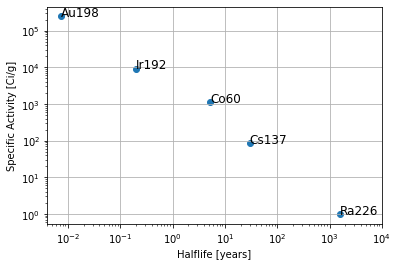

In [34]:
fig, ax = plt.subplots()
plt.scatter(halflifes, SAs)
plt.semilogy()
plt.semilogx()
plt.xlabel('Halflife [years]')
plt.ylabel('Specific Activity [Ci/g]')
for i, txt in enumerate(nuclides):
    ax.annotate(txt, (halflifes[i].magnitude, SAs[i].magnitude), fontsize=12)
plt.grid()
plt.xlim(right=10**4)
plt.show()

From the plot it is clear that $\ln(a)$ decreases linearly with $\ln(T_{1/2})$ where $T_{1/2}$ is the half life and $a$ is the specific activity. In particular, the shorter the half life of a radionuclide, the larger the specific activity.

## Part 2

This can all be combined into one plot, as was required by the question, using color and size as additional dimensions:

C:\Users\lukep\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


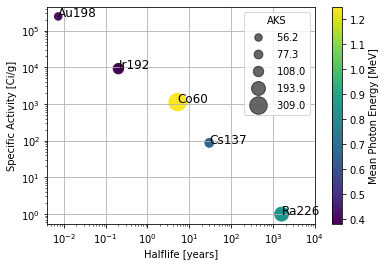

In [35]:
fig, ax = plt.subplots()
scatter = plt.scatter(halflifes, SAs, c=energies, s=AKS)
plt.semilogy()
plt.semilogx()
plt.xlabel('Halflife [years]')
plt.ylabel('Specific Activity [Ci/g]')
for i, txt in enumerate(nuclides):
    ax.annotate(txt, (halflifes[i].magnitude, SAs[i].magnitude), fontsize=12)
plt.grid()
plt.xlim(right=10**4)
plt.colorbar(label='Mean Photon Energy [MeV]')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="AKS")
plt.show()

I have included everything one a single plot, as suggested in the question, but it also helps to look at a correlation matrix when comparing the different characteristics of each radionuclide:

In [36]:
data = {'MM': molar_masses.magnitude,
        'log(HL)': np.log(halflifes.magnitude),
        'E': energies.magnitude,
        'AKS': AKS.magnitude,
        'log(SA)': np.log(SAs.magnitude),
        }
df = pd.DataFrame(data,columns=['MM','log(HL)','E','AKS', 'log(SA)'])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,MM,log(HL),E,AKS,log(SA)
MM,1.000000,-0.008490,-0.713721,-0.594180,-0.104095
log(HL),-0.008490,1.000000,0.543816,0.448625,-0.993483
E,-0.713721,0.543816,1.000000,0.924473,-0.452732
AKS,-0.594180,0.448625,0.924473,1.000000,-0.367402
log(SA),-0.104095,-0.993483,-0.452732,-0.367402,1.000000


The most clear correlation is between energy and air kerma strength. In addition, energy and molar mass seem to be negatively correlated, though this may just be by chance.

In terms of each feature:

**Brachytherapy**: Radionuclides with high specific activity can deliver a high dose rate (HDR) to patients receiving HDR treatment. The drawback is that these radionuclides typically have low halflives, and need to be replaced often. The radionuclides Co60, Cs137, and Ra226 have much longer halflifes, and can be used in low dose rate (LDR) brachytherapy without needing to be replaced as often. Energy is strongly correlated with high air kerma strength (more energy means more energy deposited) and would result in a larger dose being given to a patient. The ability to give a larger dose in a shorter amount of time permits the use dose fractionation during therapy (a technique that is more effective for treating cancer, due to, for example, reoxygenation).

**External Beam Therapy**: In external beam therapy, cobalt 60 is a good choice because it emits photons with a high energy (1.25MeV: perfect for beam therapy applications), it has a sufficient specific activity (so a reasonable flux of photons emitted) and it has a longer half life than many other gamma emitters at this energy. All other radionuclides considered in this problem have lower energy photons emitted, so they would not be as suitable for external beam therapy. 

# Question 12

Prepare necessary columns

In [37]:
A = np.arange(0, 360, 1)
B = np.sin(A*np.pi/180)
C = np.sin((A-120)*np.pi/180)
D = np.sin((A-240)*np.pi/180)

E = (A>=0)*(A<=30) * (D-C) +\
    (A>=31)*(A<=90) * (B-C) + \
    (A>=91)*(A<=150) * (B-D) + \
    (A>=151)*(A<=210) * (C-D) + \
    (A>=211)*(A<=270) * (C-B) + \
    (A>=271)*(A<=330) * (D-B) + \
    (A>=331)*(A<=360) * (D-C) 

F = np.ones(len(E))*np.mean(E)
G = np.abs(F-E)/F *100

Plot

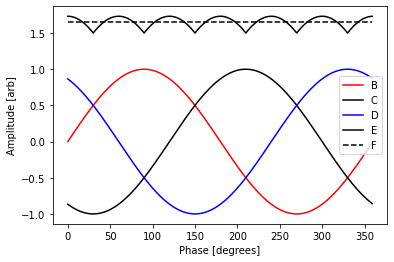

In [38]:
plt.plot(A,B,color='red', label='B')
plt.plot(A,C,color='black', label='C')
plt.plot(A,D,color='blue', label='D')
plt.plot(A,E,color='k', label='E')
plt.plot(A,F,'k--', label='F')
plt.xlabel('Phase [degrees]')
plt.ylabel('Amplitude [arb]')
plt.legend()

## Part A

Columns B, C, and D represent different phases of a AC power source

## Part B

The 6 regions in the calculation are set up such that the difference taken at each phase is always the difference between the largest and smallest amplitude. This can done more easily in python however: see the following code

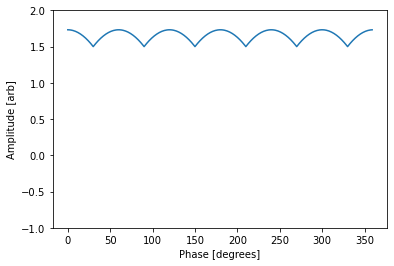

In [39]:
phases = np.array([B,C,D])
E_alt = np.choose(np.argmax(phases, axis=0), phases) - \
        np.choose(np.argmin(phases, axis=0), phases)
plt.plot(A,E_alt)
plt.xlabel('Phase [degrees]')
plt.ylabel('Amplitude [arb]')
plt.ylim(-1,2)
plt.show()

Note how easy this is; no annoying boolean indexing where we need to know the angles at which one becomes greater than another!

## Part C

The more phases there are, the closer column 'E' is to column 'F'. For example:

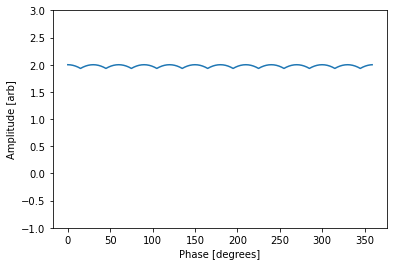

In [40]:
# Here we have 12 different phases between 0 and 360
diff_phases = np.arange(0,360,30)
phases = np.array([np.sin((A-p)*np.pi/180) for p in diff_phases])
E_alt = np.choose(np.argmax(phases, axis=0), phases) - \
        np.choose(np.argmin(phases, axis=0), phases)
plt.plot(A,E_alt)
plt.xlabel('Phase [degrees]')
plt.ylabel('Amplitude [arb]')
plt.ylim(-1,3)
plt.show()

With more phases, the lowest value is closer to -1 and the largest value is closest to +1. Thus the difference becomes relatively more constant and converges to 2. This can be seen below, where we use 24 difference phases (as opposed to 3 in the question)

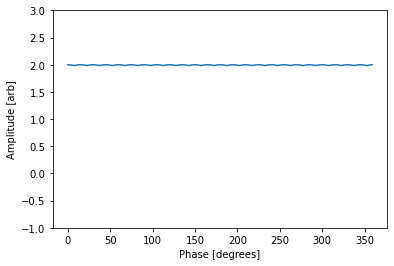

In [41]:
diff_phases = np.arange(0,360,15)
phases = np.array([np.sin((A-p)*np.pi/180) for p in diff_phases])
E_alt = np.choose(np.argmax(phases, axis=0), phases) - \
        np.choose(np.argmin(phases, axis=0), phases)
plt.plot(A,E_alt)
plt.xlabel('Phase [degrees]')
plt.ylabel('Amplitude [arb]')
plt.ylim(-1,3)
plt.show()

## Part D

The colors represent different parts of the circuit. In particular, they represent $V_A$, $V_B$, and $V_C$.

## Part E

The maximum difference:

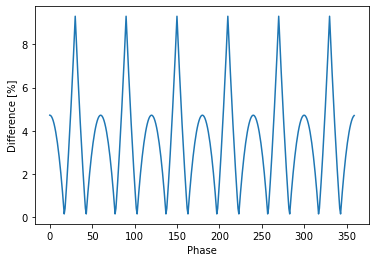

In [42]:
plt.plot(G)
plt.xlabel('Phase')
plt.ylabel('Difference [%]')
plt.show()

The maximum difference between the mean of $E$ (which we want: a constant voltage) and $E$ represents how "non-DC" the circuit is. In a truly DC system, the values on this plot would approach zero.

In [43]:
max(G)

9.307729572816491

The maximum percent difference is about 9.31%. These difference occur precisely at the angles where the column E calculation changes. In other words, this percent difference gets worse and worse until a sine curve with a new phase comes along, replaces one of the old ones (in the column E calculation).